In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("BankChurners.csv")

In [4]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [5]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [6]:
df.loc[:, ["Marital_Status"]].value_counts()

Marital_Status
Married           4687
Single            3943
Unknown            749
Divorced           748
dtype: int64

In [7]:
df.loc[:, ["Education_Level"]].value_counts()

Education_Level
Graduate           3128
High School        2013
Unknown            1519
Uneducated         1487
College            1013
Post-Graduate       516
Doctorate           451
dtype: int64

In [8]:
df.loc[:, ["Income_Category"]].value_counts()

Income_Category
Less than $40K     3561
$40K - $60K        1790
$80K - $120K       1535
$60K - $80K        1402
Unknown            1112
$120K +             727
dtype: int64

In [9]:
###Para este caso se toma como valores nulos los "unknown" ya que estos no representan ningún valor en el dataset###
dfrep= df.replace({"Unknown": "Others"})

###Se elimina la columna CLIENTNUM porque se toma como unique key ###
dfrep=dfrep.drop(['CLIENTNUM'], axis=1)
## se eliminan las ultimas dos columnas ya que son innecesarias
dfrep= dfrep.drop(dfrep.columns[-2:], axis=1)
dfrep

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Others,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Others,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Others,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [10]:
dfrep.loc[:,["Avg_Open_To_Buy"]].value_counts()/dfrep.shape[0]

Avg_Open_To_Buy
1438.3             0.031994
34516.0            0.009677
31999.0            0.002567
787.0              0.000790
713.0              0.000691
                     ...   
4911.0             0.000099
4908.0             0.000099
4904.0             0.000099
4902.0             0.000099
5597.0             0.000099
Length: 6813, dtype: float64

In [11]:
dfrep.loc[:,["Card_Category"]].value_counts()/dfrep.shape[0]*100

Card_Category
Blue             93.176656
Silver            5.480399
Gold              1.145453
Platinum          0.197492
dtype: float64

In [12]:
df_clean = dfrep.loc[ (dfrep["Card_Category"] !=  "Platinum")&(dfrep["Card_Category"] !=  "Gold")&(dfrep["Education_Level"]!="Doctorate")]
df_clean.loc[:,["Gender"]].value_counts()/dfrep.shape[0]*100

Gender
F         49.945690
M         44.327047
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa11d70a790>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa11d70ad60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa11d70a4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa11d727280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa11d727550>],
 'means': []}

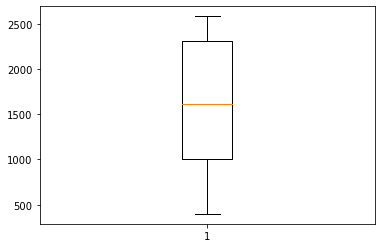

In [13]:
plt.boxplot(  df_clean.loc[ : , ["Dependent_count"] ].value_counts() )

<AxesSubplot:xlabel='Credit_Limit', ylabel='Avg_Open_To_Buy'>

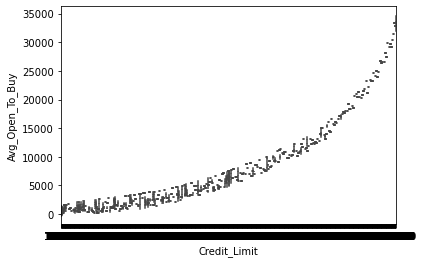

In [14]:
sns.boxplot(data=df_clean.loc[(df_clean["Card_Category"]== "Blue")&(df_clean["Gender"]== "M")&(df_clean["Marital_Status"]== "Married")]  , x="Credit_Limit" , y="Avg_Open_To_Buy")

<AxesSubplot:xlabel='Months_on_book', ylabel='Credit_Limit'>

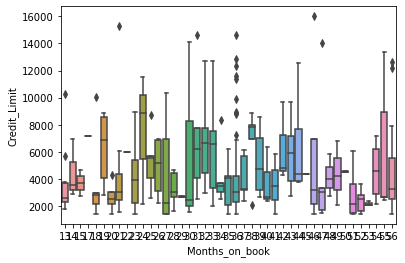

In [15]:
sns.boxplot(data=dfrep.loc[(dfrep['Gender']=='M')& (dfrep['Income_Category']== 'Less than $40K')]  , x="Months_on_book" , y="Credit_Limit")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa114295eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa1142a1490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa114295be0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa1142a1a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa1142a1d00>],
 'means': []}

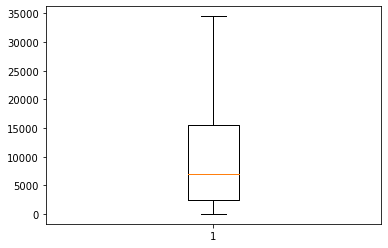

In [16]:
Avg = df_clean.loc[ (df_clean['Card_Category'] == 'Blue') & (df_clean['Gender'] == 'M') & (df_clean['Marital_Status'] == 'Single') , ['Avg_Open_To_Buy'] ]
plt.boxplot(Avg)

In [22]:
np.median(Avg)

6974.5

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa113e75e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa113e83490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa113e75d00>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa113e83a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa113e83d00>],
 'means': []}

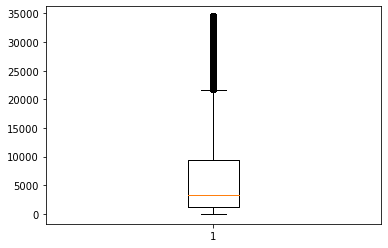

In [23]:
plt.boxplot(df_clean["Avg_Open_To_Buy"])

<AxesSubplot:xlabel='Income_Category', ylabel='Avg_Open_To_Buy'>

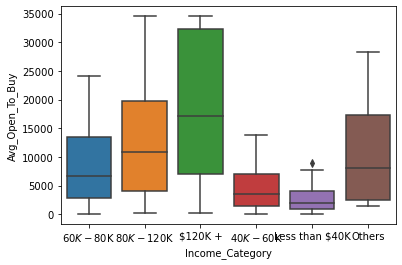

In [24]:
sns.boxplot(data=df_clean.loc[(df_clean["Card_Category"]== "Blue")&(df_clean["Gender"]== "M")&(df_clean["Marital_Status"]== "Single")]  , x="Income_Category" , y="Avg_Open_To_Buy")

Para estratificar los datos tomamos la categoria de ingreso, el numero de dependiente, el nivel de educacion  y su estado civil, de esa manera clasificamos los clientes en diferentes grupos para poder observar el compartamiento de el numero de meses de inactividad y el promedio de la linea de credio abierta en los ultimos 12 meses (Avg_Open_To_Buy).

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Avg_Open_To_Buy'>

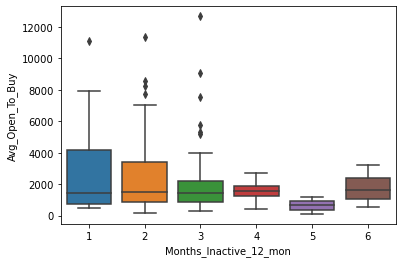

In [26]:
sns.boxplot(data= df_clean.loc[(df_clean["Income_Category"]=="Less than $40K")&(df_clean["Dependent_count"]==3)&(df_clean["Education_Level"]=="Graduate")&(df_clean["Marital_Status"]=="Married"),:] ,x="Months_Inactive_12_mon",y="Avg_Open_To_Buy")

In [27]:
dfq1=df_clean.loc[:,["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level","Avg_Open_To_Buy"]].groupby(["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level"],as_index=False).quantile(0.25)
dfq1.columns=["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level","Avg_Open_To_Buy_q1"]

In [28]:
dfq3=df_clean.loc[:,["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level","Avg_Open_To_Buy"]].groupby(["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level"],as_index=False).quantile(0.75)
dfq3.columns=["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level","Avg_Open_To_Buy_q3"]

In [29]:
dfq2=df_clean.loc[:,["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level","Avg_Open_To_Buy"]].groupby(["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level"],as_index=False).mean()
dfq2.columns=["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level","Avg_Open_To_Buy_mean"]

In [30]:
dfiqr=dfq1.merge(dfq3,on=["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level"],how="inner").merge(dfq2,on=["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level"],how="inner")

In [31]:
dfiqr["iqr"] = dfiqr.apply( lambda r: r["Avg_Open_To_Buy_q3"] - r["Avg_Open_To_Buy_q1"] , axis = 1)

In [32]:
dfiqr["upper_bound_avg"] = dfiqr.apply( lambda r:  r["Avg_Open_To_Buy_q3"] + (1.5*r["iqr"] ) , axis = 1)
dfiqr["lower_bound_avg"] = dfiqr.apply( lambda r:  r["Avg_Open_To_Buy_q1"] - (1.5*r["iqr"] ) , axis = 1)

In [33]:
df_final = df_clean.merge( dfiqr , on=["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level"] , how="left" ).copy()

In [34]:
def get_real_avg(r):
    if (r["Avg_Open_To_Buy"]<r["lower_bound_avg"]) | (r["Avg_Open_To_Buy"]>r["upper_bound_avg"]):
        return r["Avg_Open_To_Buy_mean"]
    else:
        return r["Avg_Open_To_Buy"]
    
df_final["n_avg_open_to_buy"]=df_final.apply( lambda r: get_real_avg(r) , axis = 1 )

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='n_avg_open_to_buy'>

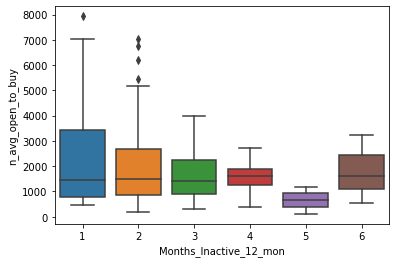

In [35]:
sns.boxplot(data= df_final.loc[(df_final["Income_Category"]=="Less than $40K")&(df_final["Dependent_count"]==3)&(df_final["Marital_Status"]=="Married")&(df_final["Education_Level"]=="Graduate"),:] ,x="Months_Inactive_12_mon",y="n_avg_open_to_buy")

Estratificacion de Limite de Credito
Agrupamos los clientes en base a su categoria de tarjeta, sus ingresos y la antiguedad del cliente, esto nos pemitira hacer comparaciones en base a la antiguedad e ingresos de un cliente ya que se esperaria que un cliente con mayor antiguedad y ademas tenga ingresos arriba de 120k tenga un limite de credito mayor a diferencia de un cliente que tiene poca antiguedad y ademas sus ingresos son inferiores a 40k 

In [36]:
dfq1 = df_clean.loc[ : , ["Credit_Limit",'Income_Category','Months_on_book'] ].groupby( ['Income_Category','Months_on_book'] , as_index = False ).quantile(0.25)
dfq1.columns = ['Income_Category','Months_on_book',"Credit_Limit_q1"]

In [37]:
dfq3 = df_clean.loc[ : , ["Credit_Limit",'Income_Category','Months_on_book'] ].groupby( ['Income_Category','Months_on_book'], as_index = False ).quantile(0.75)
dfq3.columns = ['Income_Category','Months_on_book',"Credit_Limit_q3"]

In [38]:
dfq2 = df_clean.loc[ : , ["Credit_Limit",'Income_Category','Months_on_book'] ].groupby(['Income_Category','Months_on_book']  , as_index = False ).mean()
dfq2.columns = ['Income_Category','Months_on_book',"Credit_Limit_Mean"]

In [39]:
dfiqr = dfq1.merge( dfq3 , on=['Income_Category','Months_on_book'], how="inner" ).merge( dfq2 , on=['Income_Category','Months_on_book'], how="inner" )

In [40]:
dfiqr["iqr"] = dfiqr.apply( lambda r: r["Credit_Limit_q3"] - r["Credit_Limit_q1"] , axis = 1)

In [41]:
dfiqr["upper"] = dfiqr.apply( lambda r: ( r["Credit_Limit_q3"] + 1.5*r["iqr"] ) , axis = 1)
dfiqr["lower"] = dfiqr.apply( lambda r: ( r["Credit_Limit_q1"] - 1.5*r["iqr"] ) , axis = 1)

In [42]:
df_n = df_clean.merge( dfiqr , how="left" , on=['Income_Category','Months_on_book'])

In [43]:
def getRealPrice(r):
    if ( r["Credit_Limit"] <= r["lower"] ) | ( r["Credit_Limit"] >= r["upper"] ):
        return r["Credit_Limit_Mean"]
    else:
        return r["Credit_Limit"]

In [44]:
df_n.apply( lambda r: getRealPrice(r) , axis = 1 )

0       12691.000000
1        3680.313514
2        3418.000000
3        3313.000000
4        4716.000000
            ...     
9542     4003.000000
9543     4277.000000
9544     5409.000000
9545     5281.000000
9546     3780.929630
Length: 9547, dtype: float64

In [45]:
df_n["new_Credit_limit"] = df_n.apply( lambda r: getRealPrice(r) , axis = 1 )

<AxesSubplot:xlabel='Months_on_book', ylabel='new_Credit_limit'>

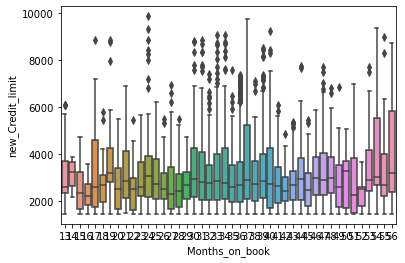

In [46]:
sns.boxplot( data=df_n.loc[(df_n['Card_Category']=='Blue')  & (df_n['Income_Category']=='Less than $40K')  ,:]  , x="Months_on_book" , y="new_Credit_limit" )

<AxesSubplot:xlabel='Income_Category', ylabel='new_Credit_limit'>

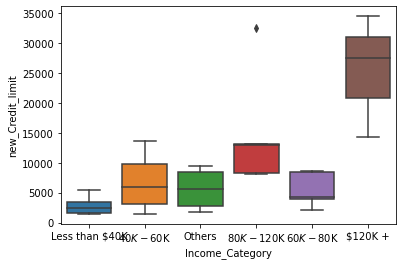

In [47]:
sns.boxplot( data=df_n.loc[(df_n['Card_Category']=='Blue')  & (df_n['Months_on_book']==20)  ,:]  , x="Income_Category" , y="new_Credit_limit" )

Datos Categoricos

In [48]:
df_clean.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [49]:
categoricals =['Attrition_Flag', 'Customer_Age', 'Gender',
                'Education_Level', 'Marital_Status','Income_Category', 'Card_Category',]

In [50]:
df_clean1=df_clean.loc[:, categoricals]

Vamos a eliminar las columnas donde los niveles distintos de las variables categoricas representan mas del 0.95

In [51]:
target = .95

columnas_Validas = []
columnas_con_muchos_niveles = []
columnas_con_1_nivel = []

for columns in categoricals:
    x = df_clean1.loc[ : , [columns] ].drop_duplicates()
    uniquevalues = x.shape[0]
    
    if uniquevalues == 1:
        columnas_con_1_nivel.append(columns)
    elif (uniquevalues / df_clean1.shape[0]) > target:
        columnas_con_muchos_niveles.append(columns)
    else:
        columnas_Validas.append(columns)
    

Para las columnas categóricas vamos encontrar aquellas columnas que tienen mas de un nivel,y que por lo menos uno de esos niveles represente mas o igual del 90%. si se cumple eliminaremos las columnas

In [52]:
target=0.95
y=pd.DataFrame()
Columns_out= []
for c_ in columnas_Validas:
    x = df_clean1.loc[ : , [c_] ].drop_duplicates()
    uniquevalues = x.shape[0]
    y = df_clean1[c_].value_counts()/df_clean1.shape[0]
    Porcentaje=y.values[0]
    if (uniquevalues > 1 and Porcentaje>=target) :
        Columns_out.append(c_)
        valid_columns.remove(c_)

Para las columnas categóricas encontraremos aquellas columnas que tengan entre 2-6 niveles. A los niveles con la frecuencia mas baja lo vamos a remplazar por la palabra Others

In [53]:
valid_columns_two_fourlevels = []
for c_ in categoricals:
    x = df_clean1.loc[ : , [c_] ].drop_duplicates()
    uniquevalues = x.shape[0]
    
    if uniquevalues >=3 and uniquevalues <=6:
        valid_columns_two_fourlevels.append(c_)

In [54]:
valid_columns_two_fourlevels

['Education_Level', 'Marital_Status', 'Income_Category']

Traducciones de Variable Education Level

In [55]:
level_frequency=pd.DataFrame()

In [56]:
level_frequency['Numero_Datos']= df_clean1['Education_Level'].value_counts()

In [57]:
level_frequency=level_frequency.reset_index()

In [58]:
level_frequency.columns=('Education_Level','Numero_Datos')

In [60]:
level_frequency['Porcentaje']=level_frequency['Numero_Datos']/df_clean1.shape[0]

In [61]:
level_frequency=level_frequency.sort_values(['Porcentaje'], ascending=False)

In [62]:
level_frequency['nEducation_Level']='Others'

In [63]:
min_value=0.208023

In [64]:
level_frequency['nEducation_Level']=level_frequency.apply( lambda r: r["Education_Level"] if r["Porcentaje"] >min_value else r["nEducation_Level"] , axis = 1 )

In [65]:
level_frequency_Education=level_frequency.loc[:, ['Education_Level','nEducation_Level']]

In [66]:
level_frequency_Education.to_csv('nEducation_level.csv')

Traducciones de variable Income Category

In [67]:
level_frequency=pd.DataFrame()

In [68]:
level_frequency['Numero_Datos']= df_clean1['Income_Category'].value_counts()

In [69]:
level_frequency=level_frequency.reset_index()

In [70]:
level_frequency.columns=('Income_Category','Numero_Datos')

In [71]:
level_frequency['Porcentaje']=level_frequency['Numero_Datos']/df_clean.shape[0]

In [72]:
level_frequency=level_frequency.sort_values(['Porcentaje'], ascending=False)

In [73]:
level_frequency['nIncome_Category']='Others'

In [74]:
min_value=level_frequency['Porcentaje'][2]

In [75]:
level_frequency['nIncome_Category']=level_frequency.apply( lambda r: r["Income_Category"] if r["Porcentaje"] > min_value else r["nIncome_Category"] , axis = 1 )

In [76]:
level_frequency_Income_Category=level_frequency.loc[:, ['Income_Category','nIncome_Category']]

In [77]:
level_frequency_Income_Category.to_csv('Income_Category_Status.csv')

Traducciones de variable Marital Status

In [78]:
level_frequency=pd.DataFrame()

In [80]:
level_frequency['Numero_Datos']= df_clean1['Marital_Status'].value_counts()

In [81]:
level_frequency=level_frequency.reset_index()

In [82]:
level_frequency.columns=('Marital_Status','Numero_Datos')

In [83]:
level_frequency['Porcentaje']=level_frequency['Numero_Datos']/df_clean1.shape[0]

In [84]:
level_frequency=level_frequency.sort_values(['Porcentaje'], ascending=False)

In [85]:
level_frequency['nMarital_Status']='Others'

In [86]:
min_value=level_frequency['Porcentaje'][1]

In [88]:
level_frequency['nMarital_Status']=level_frequency.apply( lambda r: r["Marital_Status"] if r["Porcentaje"] >min_value else r["nMarital_Status"] , axis = 1)

In [89]:
level_frequency_Marital_Status=level_frequency.loc[:, ['Marital_Status','nMarital_Status']]

In [90]:
level_frequency_Marital_Status.to_csv('nMarital_Status.csv')